In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [106]:
df_test=pd.read_csv('C:\\Users\\Snehal\\Downloads\\test_data.txt.zip',sep=":::",header=0, engine="python")
df_test.columns=["SN", "Movie_name", "confession"]
df_train=pd.read_csv('C:\\Users\\Snehal\\Downloads\\train_data.txt.zip',sep=":::",header=0,engine="python")
df_train.columns=["SN", "Movie_name", "Category","confession"]


In [107]:
df_test.head()

,SN,Movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [108]:
df_train.head()



,SN,Movie_name,Category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [109]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [110]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [111]:
df_test.info

<bound method DataFrame.info of           SN                        Movie_name  \
0          2         La guerra de papá (1977)    
1          3      Off the Beaten Track (2010)    
2          4           Meu Amigo Hindu (2015)    
3          5                Er nu zhai (1955)    
4          6               Riddle Room (2016)    
...      ...                               ...   
54194  54196   "Tales of Light & Dark" (2013)    
54195  54197      Der letzte Mohikaner (1965)    
54196  54198              Oliver Twink (2007)    
54197  54199                Slipstream (1973)    
54198  54200        Curitiba Zero Grau (2010)    

                                              confession  
0       Spain, March 1964: Quico is a very naughty ch...  
1       One year in the life of Albin and his family ...  
2       His father has died, he hasn't spoken with hi...  
3       Before he was known internationally as a mart...  
4       Emily Burns is being held captive in a room w...  
...          

In [112]:
df_train.info

<bound method DataFrame.info of           SN                                    Movie_name       Category  \
0          2                                 Cupid (1997)       thriller    
1          3             Young, Wild and Wonderful (1980)          adult    
2          4                        The Secret Sin (1915)          drama    
3          5                       The Unrecovered (2007)          drama    
4          6                       Quality Control (2011)    documentary    
...      ...                                           ...            ...   
54208  54210                              "Bonino" (1953)         comedy    
54209  54211                  Dead Girls Don't Cry (????)         horror    
54210  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54211  54213                     Make Your Own Bed (1944)         comedy    
54212  54214   Nature's Fury: Storm of the Century (2006)        history    

                                           

In [113]:
df_test.shape

(54199, 3)

In [114]:
df_train.shape

(54213, 4)

In [115]:
df_test.isnull().sum()

SN            0
Movie_name    0
confession    0
dtype: int64

In [116]:
df_train.isnull().sum()

SN            0
Movie_name    0
Category      0
confession    0
dtype: int64

In [117]:
(df_train.isnull().sum()/df_train.shape[0]*df_train.shape[1])*100  

SN            0.0
Movie_name    0.0
Category      0.0
confession    0.0
dtype: float64

In [118]:
(df_test.isnull().sum()/df_test.shape[0]*df_test.shape[1])*100

SN            0.0
Movie_name    0.0
confession    0.0
dtype: float64

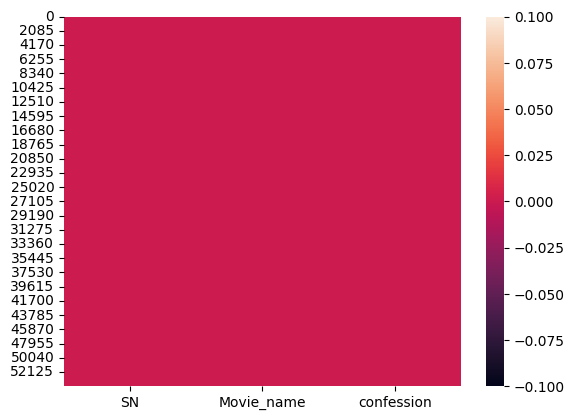

In [119]:
sns.heatmap(df_test.isnull())
plt.show()

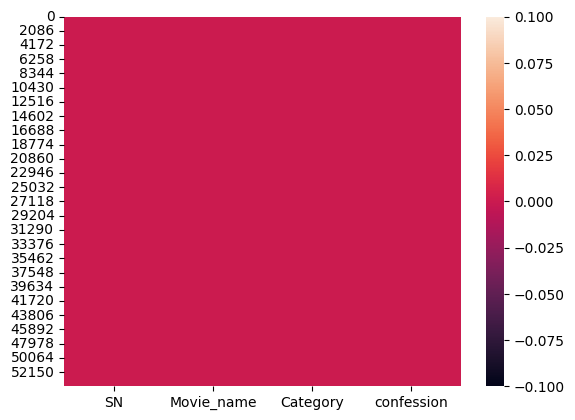

In [120]:
sns.heatmap(df_train.isnull())
plt.show()

In [121]:
df_test.count()

SN            54199
Movie_name    54199
confession    54199
dtype: int64

In [122]:
df_train.count()

SN            54213
Movie_name    54213
Category      54213
confession    54213
dtype: int64

In [123]:
df_train.iloc[0:3]

,SN,Movie_name,Category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [124]:
df_train.loc[0]

SN                                                            2
Movie_name                                        Cupid (1997) 
Category                                              thriller 
confession     A brother and sister with a past incestuous r...
Name: 0, dtype: object

In [125]:
df_test.shape

(54199, 3)

In [126]:
df_train.shape

(54213, 4)

Visualization Data

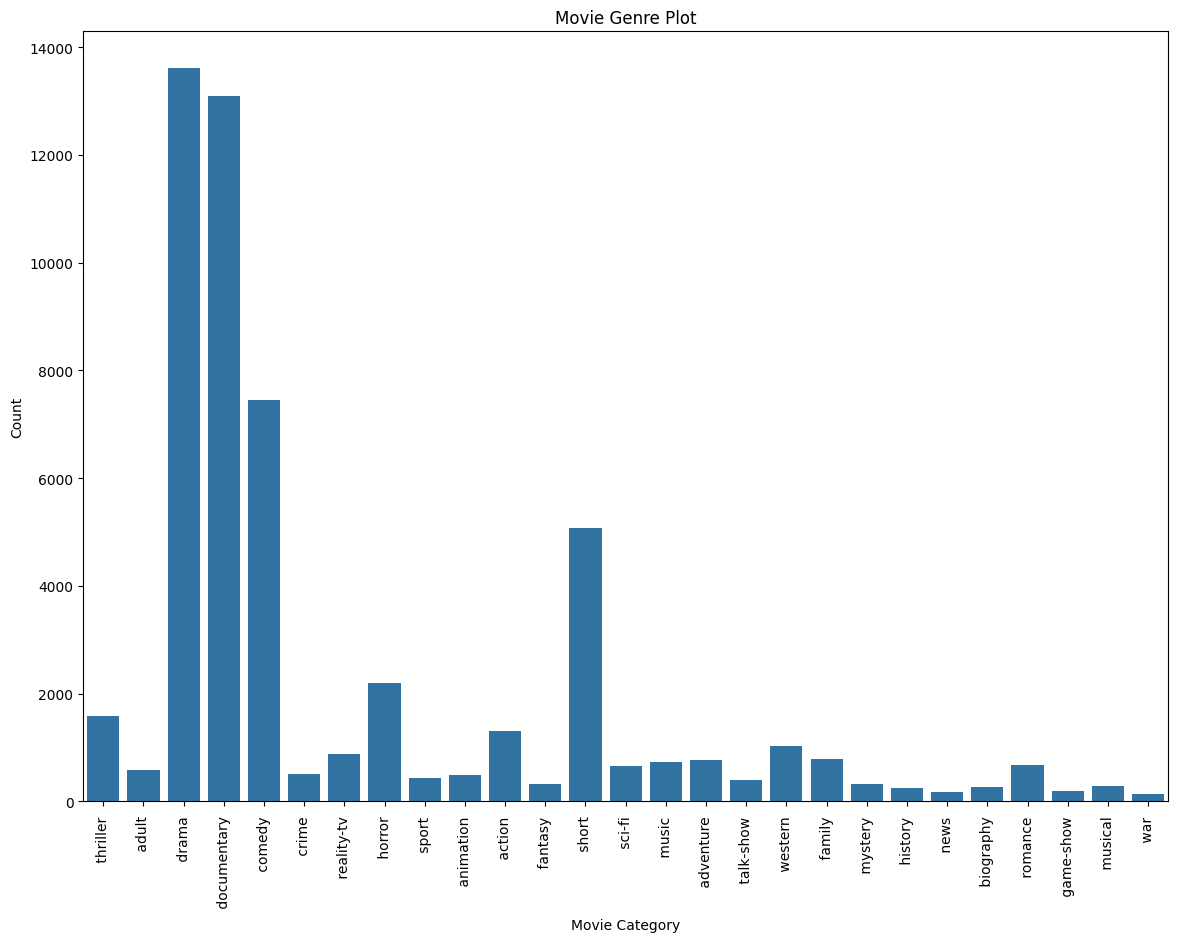

In [127]:
plt.figure(figsize=(14,10))
sns.countplot(x="Category", data=df_train)
plt.xlabel("Movie Category")
plt.ylabel("Count")
plt.title("Movie Genre Plot")
plt.xticks(rotation=90)
plt.show()

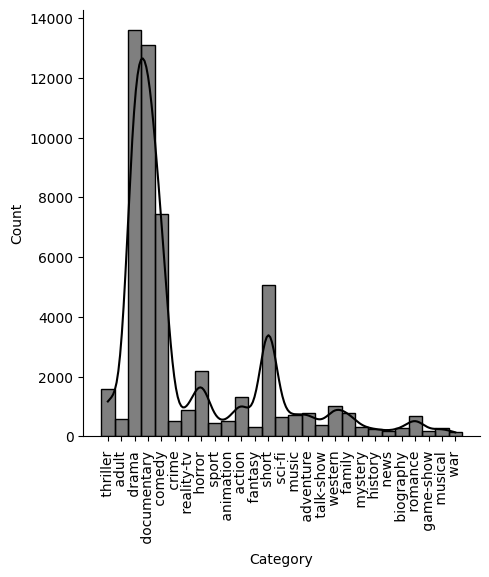

In [128]:
sns.displot(df_train.Category, kde=True, color="black")
plt.xticks(rotation=90);

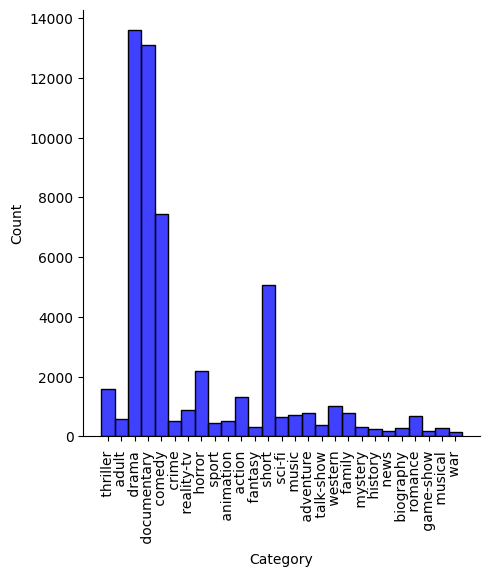

In [129]:
sns.displot(df_train.Category, kde=False, color="blue")
plt.xticks(rotation=90);

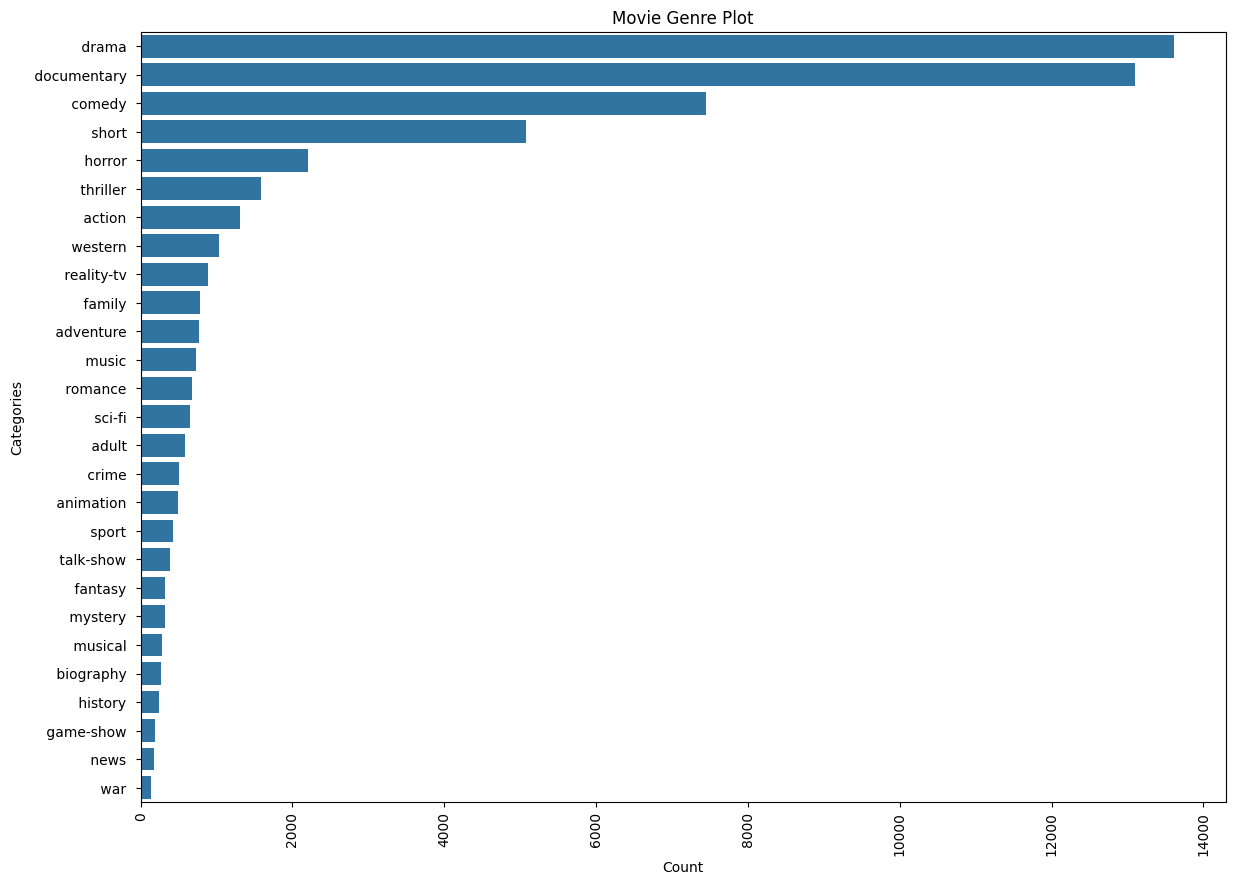

In [130]:
plt.figure(figsize=(14,10))
count1=df_train.Category.value_counts()
sns.barplot(x=count1, y=count1.index ,orient='h')
plt.xlabel("Count")
plt.ylabel("Categories")
plt.title("Movie Genre Plot")
plt.xticks(rotation=90)
plt.show()

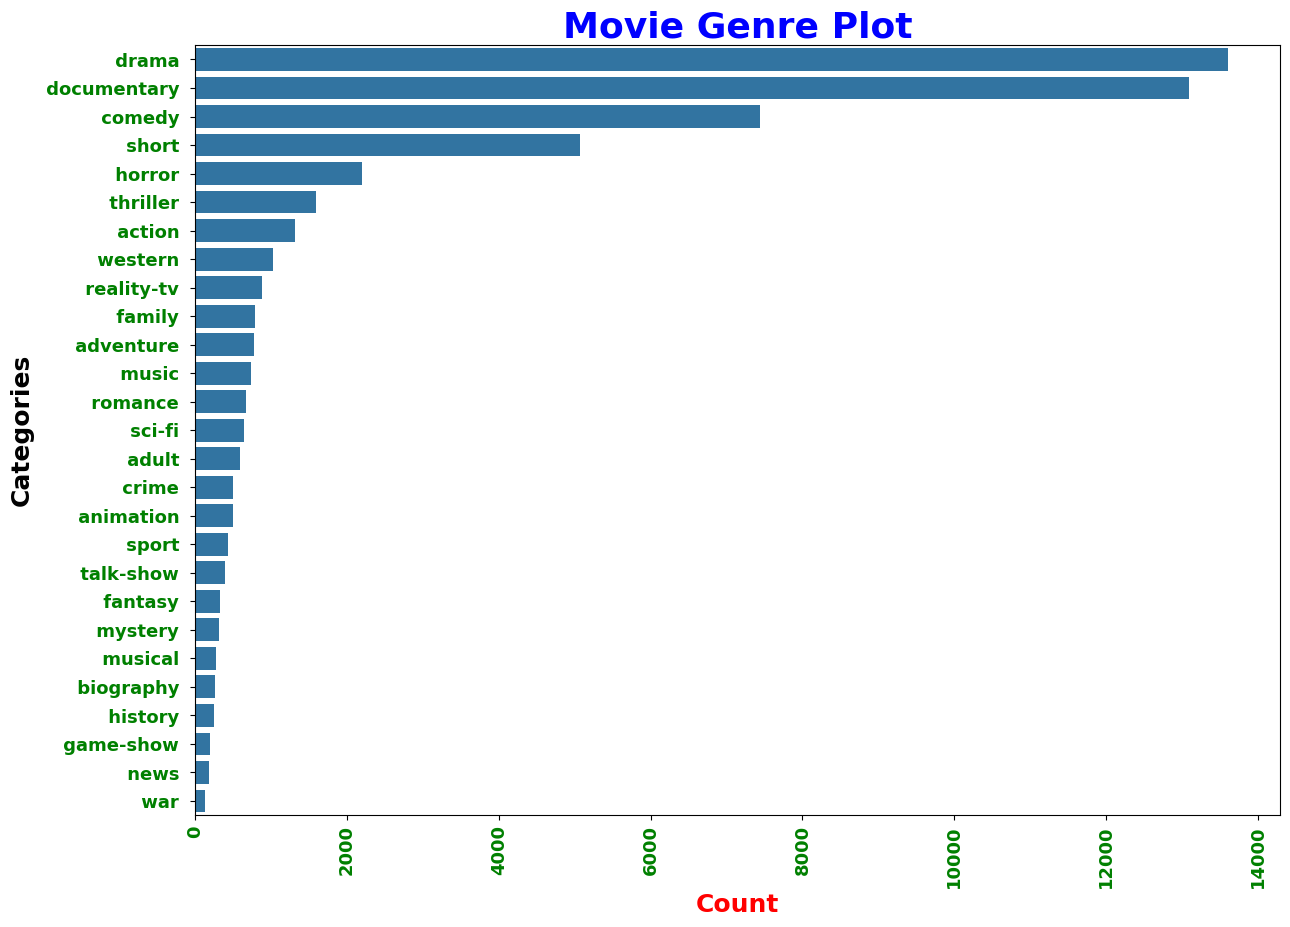

In [131]:
plt.figure(figsize=(14,10))
count1=df_train.Category.value_counts()
sns.barplot(x=count1, y=count1.index ,orient='h')
plt.xlabel("Count",fontsize=18,fontweight='bold',color='Red')
plt.ylabel("Categories",fontsize=18, fontweight='bold', color='Black')
plt.title("Movie Genre Plot", fontsize=26, fontweight='bold', color='blue')
plt.xticks(rotation=90,fontsize=13,fontweight='bold', color='green')
plt.yticks(fontsize=13,fontweight='bold', color='green')
plt.show()

In [132]:
df_combined=pd.concat([df_train,df_test],axis=0)

In [133]:
df_combined

,SN,Movie_name,Category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...,...
54194,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [134]:
df_combined.shape

(108412, 4)

In [135]:
df_combined.size

433648

In [136]:
df_combined.isnull().any()

SN            False
Movie_name    False
Category       True
confession    False
dtype: bool

In [137]:
df_combined.count()

SN            108412
Movie_name    108412
Category       54213
confession    108412
dtype: int64

In [138]:
encoder=LabelEncoder()
df_combined["Category"]=encoder.fit_transform(df_combined["Category"].values)

In [139]:
encoder=LabelEncoder()
df_combined["Movie_name"]=encoder.fit_transform(df_combined["Movie_name"].values)

In [140]:
df_combined.head()

,SN,Movie_name,Category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


Fill the data in the category

In [141]:
df_combined.Category= df_combined.Category.fillna(df_combined.Category.mean())

In [142]:
df_combined.count()

SN            108412
Movie_name    108412
Category      108412
confession    108412
dtype: int64

In [143]:
df_combined.duplicated().values.any()

np.False_

Preprocess the Data

In [144]:
vectorizer=TfidfVectorizer()

In [150]:
X=vectorizer.fit_transform(df_combined["confession"])

In [151]:
df_combined.head()

,SN,Movie_name,Category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [152]:
Y=df_combined["Category"]

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

Train Naive Bayes Classifier

In [154]:
naive_bayes_model=MultinomialNB()

In [155]:
naive_bayes_model.fit(X_train,Y_train)

MultinomialNB()

In [156]:
nb_predictions=naive_bayes_model.predict(X_test)

In [157]:
print("Naive Bayes Model")
print(confusion_matrix(Y_test, nb_predictions))
print(classification_report(Y_test, nb_predictions))
print("Accuracy: ", accuracy_score(Y_test, nb_predictions))
print("r2 Score: ", r2_score(Y_test, nb_predictions))

Naive Bayes Model
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0  

C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Train Logistic Regression Model

In [162]:
logistic_regression_model=LogisticRegression()

In [163]:
logistic_regression_model.fit(X_train,Y_train)

C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [166]:
lr_predictions=logistic_regression_model.predict(X_test)

In [165]:
print("Logistic Regression Model")
print(confusion_matrix(Y_test, lr_predictions))
print(classification_report(Y_test, lr_predictions))
print("Accuracy: ", accuracy_score(Y_test, lr_predictions))
print("r2 Score: ", r2_score(Y_test,lr_predictions))

Logistic Regression Model
[[   2    0    0    0    0    0    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0  251]
 [   0    3    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    1    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  143]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0  102    0    1   17    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1367]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    0
     0    0    0    0    0    0 

C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snehal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,